In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dividing India into 6 zones

india_zones = {
    "Northern Zone": {
        "States": ["Haryana", "Himachal Pradesh", "Punjab", "Rajasthan", "Uttarakhand", "Uttar Pradesh"],
        "Union Territories": ["Delhi NCR", "Ladakh", "Jammu And Kashmir", "Chandigarh"]
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman And Nicobar Islands"]
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Odisha", "West Bengal"]
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["Dadra and Nagar Haveli", "Daman and Diu"]
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh"]
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"]
    }
}

# Accessing the zones
for zone, divisions in india_zones.items():
    print(f"{zone}:")
    for division, places in divisions.items():
        print(f"  {division}: {', '.join(places)}")
    print()


Northern Zone:
  States: Haryana, Himachal Pradesh, Punjab, Rajasthan, Uttarakhand, Uttar Pradesh
  Union Territories: Delhi NCR, Ladakh, Jammu And Kashmir, Chandigarh

Southern Zone:
  States: Andhra Pradesh, Karnataka, Kerala, Tamil Nadu, Telangana
  Union Territories: Puducherry, Lakshadweep, Andaman And Nicobar Islands

Eastern Zone:
  States: Bihar, Jharkhand, Odisha, West Bengal

Western Zone:
  States: Goa, Gujarat, Maharashtra
  Union Territories: Dadra and Nagar Haveli, Daman and Diu

Central Zone:
  States: Chhattisgarh, Madhya Pradesh

North-Eastern Zone:
  States: Arunachal Pradesh, Assam, Manipur, Meghalaya, Mizoram, Nagaland, Tripura, Sikkim



In [3]:
dataset9_path = 'Datasets\\Dataset9.csv'
data9 = pd.read_csv(dataset9_path)
data9

,State,District,Total Gram Panchayats,Service Ready Gram Panchayats,Unnamed: 4
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,8,7,NaN
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,37,37,NaN
2,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,30,30,NaN
3,ANDHRA PRADESH,ANANTAPUR,1044,996,NaN
4,ANDHRA PRADESH,CHITTOOR,1412,1193,NaN
...,...,...,...,...,...
711,WEST BENGAL,NADIA,185,185,NaN
712,WEST BENGAL,PASCHIM BARDHAMAN,62,56,NaN
713,WEST BENGAL,PURBA BARDHAMAN,215,146,NaN
714,WEST BENGAL,PURULIA,170,170,NaN


In [4]:
print('Columns in the dataset:', data9.columns)

Columns in the dataset: Index(['State ', 'District', 'Total Gram Panchayats',
       'Service Ready Gram Panchayats', 'Unnamed: 4'],
      dtype='object')


In [5]:
# Remove the space in 'State ' column
data9.rename(columns={'State ': 'State'}, inplace=True)

In [6]:
# Check unique values of 'Unnamed: 4' column
print('Unique values in Unnamed: 4 column:', data9['Unnamed: 4'].unique())

Unique values in Unnamed: 4 column: [nan]


Since all are na'an values, we will drop the column.

In [7]:
# Drop the column 'Unnamed: 4'
data9 = data9.drop(columns=['Unnamed: 4'])
data9

,State,District,Total Gram Panchayats,Service Ready Gram Panchayats
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,8,7
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,37,37
2,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,30,30
3,ANDHRA PRADESH,ANANTAPUR,1044,996
4,ANDHRA PRADESH,CHITTOOR,1412,1193
...,...,...,...,...
711,WEST BENGAL,NADIA,185,185
712,WEST BENGAL,PASCHIM BARDHAMAN,62,56
713,WEST BENGAL,PURBA BARDHAMAN,215,146
714,WEST BENGAL,PURULIA,170,170


In [8]:
# Dropping the last row of the dataset (total row)
data9 = data9.drop(data9.index[-1])
data9

,State,District,Total Gram Panchayats,Service Ready Gram Panchayats
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,8,7
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,37,37
2,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,30,30
3,ANDHRA PRADESH,ANANTAPUR,1044,996
4,ANDHRA PRADESH,CHITTOOR,1412,1193
...,...,...,...,...
710,WEST BENGAL,MURSHIDABAD,250,250
711,WEST BENGAL,NADIA,185,185
712,WEST BENGAL,PASCHIM BARDHAMAN,62,56
713,WEST BENGAL,PURBA BARDHAMAN,215,146


In [9]:
# Checking for missing values
print('Missing values in the dataset:', data9.isnull().sum())

Missing values in the dataset: State                            0
District                         0
Total Gram Panchayats            0
Service Ready Gram Panchayats    0
dtype: int64


No missing values in the dataset.

In [10]:
# Change THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU to DADRA AND NAGAR HAVELI
# Change 'UTTAR PRADESH EAST' and 'UTTAR PRADESH WEST' to 'UTTAR PRADESH'

data9['State'] = data9['State'].replace('THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU', 'DADRA AND NAGAR HAVELI')
data9['State'] = data9['State'].replace('UTTAR PRADESH EAST', 'UTTAR PRADESH')
data9['State'] = data9['State'].replace('UTTAR PRADESH WEST', 'UTTAR PRADESH')

# Check if the changes were successful
print('States in the dataset:', data9['State'].unique())

States in the dataset: ['ANDAMAN AND NICOBAR ISLANDS' 'ANDHRA PRADESH' 'ARUNACHAL PRADESH'
 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA' 'GUJARAT' 'HARYANA'
 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'JHARKHAND' 'KARNATAKA' 'KERALA'
 'LADAKH' 'LAKSHADWEEP' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR'
 'MEGHALAYA' 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUDUCHERRY' 'PUNJAB'
 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU' 'TELANGANA' 'DADRA AND NAGAR HAVELI'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL']


In [11]:
# Create a new 'Zone' column in data9 DataFrame
data9['Zone'] = pd.Series(dtype='object')

# Assign each state to a corresponding zone
for index, row in data9.iterrows():
    state = row['State'].strip().lower()  # Normalize case and remove extra spaces
    zone_assigned = False  # Flag to check if a state was assigned to a zone
    
    for zone, divisions in india_zones.items():
        # Check within both 'States' and 'Union Territories' in each zone
        if any(state == place.lower() for place in divisions.get("States", []) + divisions.get("Union Territories", [])):
            data9.at[index, 'Zone'] = zone
            zone_assigned = True
            break
    
    # Handle cases where no zone was assigned
    if not zone_assigned:
        data9.at[index, 'Zone'] = 'Unassigned'

# Reorder columns to move 'Zone' to the first position
data9 = data9[['Zone'] + [col for col in data9.columns if col != 'Zone']]

data9

,Zone,State,District,Total Gram Panchayats,Service Ready Gram Panchayats
0,Southern Zone,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,8,7
1,Southern Zone,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,37,37
2,Southern Zone,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,30,30
3,Southern Zone,ANDHRA PRADESH,ANANTAPUR,1044,996
4,Southern Zone,ANDHRA PRADESH,CHITTOOR,1412,1193
...,...,...,...,...,...
710,Eastern Zone,WEST BENGAL,MURSHIDABAD,250,250
711,Eastern Zone,WEST BENGAL,NADIA,185,185
712,Eastern Zone,WEST BENGAL,PASCHIM BARDHAMAN,62,56
713,Eastern Zone,WEST BENGAL,PURBA BARDHAMAN,215,146


In [12]:
# Is there any unassigned zone in the 'Zone' column?
print('Unassigned zones:', data9[data9['Zone'] == 'Unassigned']['State'].unique())

Unassigned zones: []


In [ ]:
# Combine the zones into a single row and add the corresponding columns
zone_data = data9.groupby('Zone').sum().reset_index()
# drop 'State' and 'District' columns
zone_data = zone_data.drop(columns=['State', 'District'])
zone_data

,Zone,Total Gram Panchayats,Service Ready Gram Panchayats
0,Central Zone,34454,27429
1,Eastern Zone,22879,22104
2,North-Eastern Zone,12002,5986
3,Northern Zone,104991,76769
4,Southern Zone,45808,39085
5,Western Zone,42366,38471


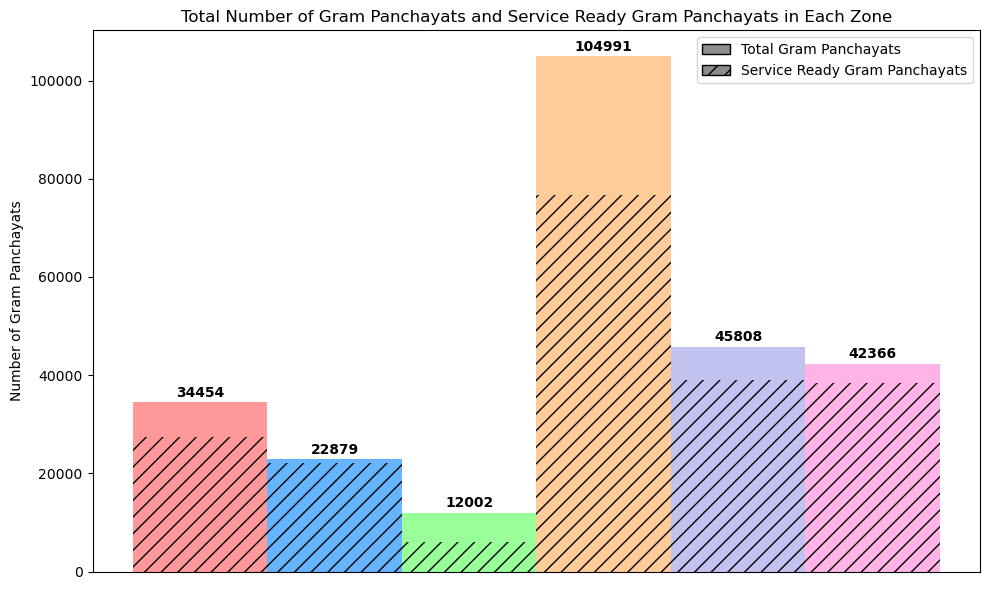

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Sample data based on description, since I don't have direct access to 'zone_data'
zone_data = pd.DataFrame({
    'Zone': ['Central Zone', 'Eastern Zone', 'North-Eastern Zone', 'Northern Zone', 'Southern Zone', 'Western Zone'],
    'Total Gram Panchayats': [34454, 22879, 12002, 104991, 45808, 42366],
    'Service Ready Gram Panchayats': [27429, 22104, 5986, 76769, 39085, 38471]
})

# Define zones in order and color palette
zones = zone_data['Zone'].tolist()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Extract counts for plotting
total_counts = zone_data['Total Gram Panchayats'].tolist()
ready_counts = zone_data['Service Ready Gram Panchayats'].tolist()

# Plotting
plt.figure(figsize=(10, 6))

# Plot each zone's bar with two segments
for i, (zone, color, total, ready) in enumerate(zip(zones, colors, total_counts, ready_counts)):
    # Total bar
    plt.bar(zone, total, color=color, width=1.0)
    # Segment representing service-ready gram panchayats with a hatch pattern
    plt.bar(zone, ready, color=color, width=1.0, hatch='//')
    
    # Display the total number at the top of each bar
    plt.text(i, total + 500, str(total), ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.title('Total Number of Gram Panchayats and Service Ready Gram Panchayats in Each Zone')
plt.ylabel('Number of Gram Panchayats')

# Remove x-axis labels
plt.xticks([], [])

# Create custom legend
legend_elements = [
    Patch(facecolor='#8c8c8c', edgecolor='black', label='Total Gram Panchayats'),
    Patch(facecolor='#8c8c8c', edgecolor='black', hatch='//', label='Service Ready Gram Panchayats')
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


In [18]:
# Count the statewise number of Gram Panchayats in the Northern zone that are not Service Ready
# Not Service Ready = [Total Gram Panchayats]	- [Service Ready Gram Panchayats]
northern_zone = data9[data9['Zone'] == 'Northern Zone']
northern_zone['Not Service Ready'] = northern_zone['Total Gram Panchayats'] - northern_zone['Service Ready Gram Panchayats']
northern_zone[['State', 'Total Gram Panchayats', 'Service Ready Gram Panchayats', 'Not Service Ready']]
# Group by state
northern_zone.groupby('State')[['Total Gram Panchayats', 'Service Ready Gram Panchayats', 'Not Service Ready']].sum()

C:\Users\Sachin Motwani\AppData\Local\Temp\ipykernel_7204\282797525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_zone['Not Service Ready'] = northern_zone['Total Gram Panchayats'] - northern_zone['Service Ready Gram Panchayats']


,Total Gram Panchayats,Service Ready Gram Panchayats,Not Service Ready
State,,,
HARYANA,6171,5997,174
HIMACHAL PRADESH,3206,409,2797
JAMMU AND KASHMIR,4286,1089,3197
LADAKH,192,192,0
PUNJAB,13263,12594,669
RAJASTHAN,11341,8765,2576
UTTAR PRADESH,58742,45885,12857
UTTARAKHAND,7790,1838,5952


Hypothesis Testing:

**Null hypothesis**:  90% of gram panchayats in each Indian zone are service ready

**Alternative hypothesis**: Nearly 90% of gram panchayats in each Indian zone are not service ready

We will use the chi-square test to test the hypothesis.

In [ ]:
import numpy as np
from scipy.stats import norm
import pandas as pd

# Sample 35 rows (or less if not available) from each zone without altering the grouping columns
sampled_data9 = data9.groupby('Zone', group_keys=False).apply(lambda x: x.sample(min(len(x), 35), random_state=1)).reset_index(drop=True)

# Summarize the sampled data by zone
zone_sample_summary = sampled_data9.groupby('Zone').agg({
    'Total Gram Panchayats': 'sum',
    'Service Ready Gram Panchayats': 'sum'
}).reset_index()

# Hypothesized proportion
p_hypothesis = 0.90 # 90% service-ready proportion
alpha = 0.05  # significance level

# Perform Z-test for proportions
z_test_results = []
for _, row in zone_sample_summary.iterrows():
    zone = row['Zone']
    total = row['Total Gram Panchayats']
    ready = row['Service Ready Gram Panchayats']
    
    # Observed proportion
    p_observed = ready / total
    
    # Standard error
    se = np.sqrt(p_hypothesis * (1 - p_hypothesis) / total)
    
    # Z-score
    z_score = (p_observed - p_hypothesis) / se
    
    # p-value for two-tailed test
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    
    # Determine result based on p-value
    result = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    
    # Store results
    z_test_results.append({
        'Zone': zone,
        'Total Gram Panchayats': total,
        'Service Ready Gram Panchayats': ready,
        'Observed Proportion': p_observed,
        'Hypothesis Proportion': p_hypothesis,
        'Z-Score': z_score,
        'P-Value': p_value,
        'Result': result
    })

# Convert results to DataFrame and output results
z_test_results_df = pd.DataFrame(z_test_results)
z_test_results_df


C:\Users\Sachin Motwani\AppData\Local\Temp\ipykernel_7204\4272632123.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data9 = data9.groupby('Zone', group_keys=False).apply(lambda x: x.sample(min(len(x), 35), random_state=1)).reset_index(drop=True)


,Zone,Total Gram Panchayats,Service Ready Gram Panchayats,Observed Proportion,Hypothesis Proportion,Z-Score,P-Value,Result
0,Central Zone,16691,12671,0.759152,0.9,-60.655714,0.000000,Reject H0
1,Eastern Zone,6083,5540,0.910735,0.9,2.790828,0.005257,Reject H0
2,North-Eastern Zone,4479,1990,0.444296,0.9,-101.660560,0.000000,Reject H0
3,Northern Zone,15819,10655,0.673557,0.9,-94.935127,0.000000,Reject H0
4,Southern Zone,12997,10059,0.773948,0.9,-47.901666,0.000000,Reject H0
5,Western Zone,22981,20749,0.902876,0.9,1.453435,0.146103,Fail to Reject H0


In [40]:
import numpy as np
from scipy.stats import norm
import pandas as pd

# Sample 35 rows (or less if not available) from each zone without altering the grouping columns
sampled_data9 = data9.groupby('Zone', group_keys=False).apply(lambda x: x.sample(min(len(x), 35), random_state=1)).reset_index(drop=True)

# Summarize the sampled data by zone
zone_sample_summary = sampled_data9.groupby('Zone').agg({
    'Total Gram Panchayats': 'sum',
    'Service Ready Gram Panchayats': 'sum'
}).reset_index()

# Hypothesized proportion
p_hypothesis = 0.75
alpha = 0.05  # significance level

# Perform Z-test for proportions
z_test_results = []
for _, row in zone_sample_summary.iterrows():
    zone = row['Zone']
    total = row['Total Gram Panchayats']
    ready = row['Service Ready Gram Panchayats']
    
    # Observed proportion
    p_observed = ready / total
    
    # Standard error
    se = np.sqrt(p_hypothesis * (1 - p_hypothesis) / total)
    
    # Z-score
    z_score = (p_observed - p_hypothesis) / se
    
    # p-value for two-tailed test
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    
    # Determine result based on p-value
    result = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    
    # Store results
    z_test_results.append({
        'Zone': zone,
        'Total Gram Panchayats': total,
        'Service Ready Gram Panchayats': ready,
        'Observed Proportion': p_observed,
        'Hypothesis Proportion': p_hypothesis,
        'Z-Score': z_score,
        'P-Value': p_value,
        'Result': result
    })

# Convert results to DataFrame and output results
z_test_results_df = pd.DataFrame(z_test_results)
z_test_results_df


C:\Users\Sachin Motwani\AppData\Local\Temp\ipykernel_7204\2661475477.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data9 = data9.groupby('Zone', group_keys=False).apply(lambda x: x.sample(min(len(x), 35), random_state=1)).reset_index(drop=True)


,Zone,Total Gram Panchayats,Service Ready Gram Panchayats,Observed Proportion,Hypothesis Proportion,Z-Score,P-Value,Result
0,Central Zone,16691,12671,0.759152,0.75,2.730483,6.324168e-03,Reject H0
1,Eastern Zone,6083,5540,0.910735,0.75,28.951314,0.000000e+00,Reject H0
2,North-Eastern Zone,4479,1990,0.444296,0.75,-47.248887,0.000000e+00,Reject H0
3,Northern Zone,15819,10655,0.673557,0.75,-22.203730,0.000000e+00,Reject H0
4,Southern Zone,12997,10059,0.773948,0.75,6.305030,2.881380e-10,Reject H0
5,Western Zone,22981,20749,0.902876,0.75,53.520968,0.000000e+00,Reject H0


In [42]:
import numpy as np
from scipy.stats import norm
import pandas as pd

# Sample 35 rows (or less if not available) from each zone without altering the grouping columns
sampled_data9 = data9.groupby('Zone', group_keys=False).apply(lambda x: x.sample(min(len(x), 35), random_state=1)).reset_index(drop=True)

# Summarize the sampled data by zone
zone_sample_summary = sampled_data9.groupby('Zone').agg({
    'Total Gram Panchayats': 'sum',
    'Service Ready Gram Panchayats': 'sum'
}).reset_index()

# Hypothesized proportion
p_hypothesis = 0.75
alpha = 0.05  # significance level

# Perform one-tailed Z-test for proportions
z_test_results = []
for _, row in zone_sample_summary.iterrows():
    zone = row['Zone']
    total = row['Total Gram Panchayats']
    ready = row['Service Ready Gram Panchayats']
    
    # Observed proportion
    p_observed = ready / total
    
    # Standard error
    se = np.sqrt(p_hypothesis * (1 - p_hypothesis) / total)
    
    # Z-score
    z_score = (p_observed - p_hypothesis) / se
    
    # p-value for one-tailed test
    p_value = 1 - norm.cdf(z_score)  # Only testing if p_observed > p_hypothesis
    
    # Determine result based on p-value
    result = "Reject H0" if p_value > alpha else "Fail to Reject H0"
    
    # Store results
    z_test_results.append({
        'Zone': zone,
        'Total Gram Panchayats': total,
        'Service Ready Gram Panchayats': ready,
        'Observed Proportion': p_observed,
        'Hypothesis Proportion': p_hypothesis,
        'Z-Score': z_score,
        'P-Value': p_value,
        'Result': result
    })

# Convert results to DataFrame and output results
z_test_results_df = pd.DataFrame(z_test_results)
z_test_results_df


C:\Users\Sachin Motwani\AppData\Local\Temp\ipykernel_7204\3321547462.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data9 = data9.groupby('Zone', group_keys=False).apply(lambda x: x.sample(min(len(x), 35), random_state=1)).reset_index(drop=True)


,Zone,Total Gram Panchayats,Service Ready Gram Panchayats,Observed Proportion,Hypothesis Proportion,Z-Score,P-Value,Result
0,Central Zone,16691,12671,0.759152,0.75,2.730483,3.162084e-03,Fail to Reject H0
1,Eastern Zone,6083,5540,0.910735,0.75,28.951314,0.000000e+00,Fail to Reject H0
2,North-Eastern Zone,4479,1990,0.444296,0.75,-47.248887,1.000000e+00,Reject H0
3,Northern Zone,15819,10655,0.673557,0.75,-22.203730,1.000000e+00,Reject H0
4,Southern Zone,12997,10059,0.773948,0.75,6.305030,1.440690e-10,Fail to Reject H0
5,Western Zone,22981,20749,0.902876,0.75,53.520968,0.000000e+00,Fail to Reject H0


In [26]:
# Number of rows in each zone for data9
zone_counts = data9['Zone'].value_counts()
zone_counts

Zone
Northern Zone         199
Southern Zone         131
North-Eastern Zone    119
Eastern Zone          114
Central Zone           80
Western Zone           72
Name: count, dtype: int64